# Intro to TensorFlow: Classify images of clothing

In [1]:
# import Tensorflow
import tensorflow as tf 

# import the other helper libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.layers import Dense
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
#complete the code below:
fashion_mnist = keras.datasets.fashion_mnist

#load the data into train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
#store the class names in a list
#complete the code below
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
#check the dimensions of the training data
train_images.shape


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
#verify the number of train_lables
train_labels.shape


(60000,)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [6]:
#verify the number of images in test_images by checking the dimensions
test_images.shape


(10000, 28, 28)

And the test set contains 10,000 images labels:

In [7]:
#verify the number of images in test_labels
test_labels.shape


(10000,)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

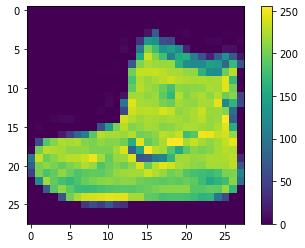

In [8]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [9]:
#complete the code below

train_images = train_images / 255.0

test_images = test_images / 255.0


To verify that the data is in the correct format and that you're ready to build and train the network, display the first 25 images from the *training set* and display the class name below each image.

In [122]:
#write code below

for i in range(0,25):
    print(train_images[i])
    print(class_names[train_labels[i]])
    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.03529412 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01568627 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.02352941 0.11764706 0.01176471
  0.01568627 0.01568627 0.05098039 0.08235294 0.11764706 0.19215686
  0.12156863 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.61960784 0.89803922 0.83921569
  0.84313725 0.81568627 0.83137255 0.84313725 0.83921569 0.89019608
  0.89411765 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.79215686 0

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [11]:
#create a model having the layers defined below this cell

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers with a 'BatchNormalization()' layer in between the 2 dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 
The Batch Normalization layer works by performing a series of operations on the incoming input data. The set of operations involves standardization, normalization, rescaling and shifting of offset of input values coming into the BN layer.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [12]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [13]:
#write code below setting epochs=10:

model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4911 - accuracy: 0.8279
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4033 - accuracy: 0.8554
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3707 - accuracy: 0.8659
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3493 - accuracy: 0.8738
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8781
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3237 - accuracy: 0.8823
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8855
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8861
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8894
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.291

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset using model.evaluate():

In [14]:
#complete code below

test_loss, test_acc = model.evaluate(test_images,  test_labels, batch_size=64, verbose=1,sample_weight=None, use_multiprocessing=False)

print('\nTest accuracy:', test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8720

Test accuracy: 0.871999979019165


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [15]:
#complete code below
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
#predict on the test_images using the probability_model
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [17]:
predictions[0]

array([3.12150861e-09, 2.07608264e-10, 3.89810317e-09, 1.35607667e-08,
       1.46357426e-09, 2.86652503e-04, 4.84490625e-09, 1.27230817e-03,
       1.12130055e-10, 9.98441041e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [18]:
#use np.argmax to find the highest confidence value
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [19]:
test_labels[0]

9

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
Plot should look like this:
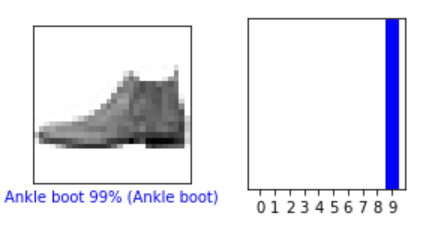

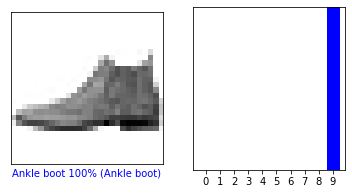

In [20]:
#plot the 0th image and next to that plot a bar graph of the predicted values for that image
#  if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Similarly plot the image and predicted values for another value in the test_images

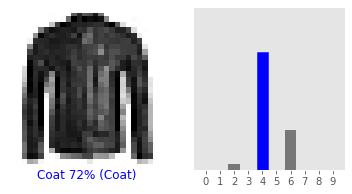

In [121]:
#write code below
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

plot several images with their predictions. Note that the model can be wrong even when very confident.

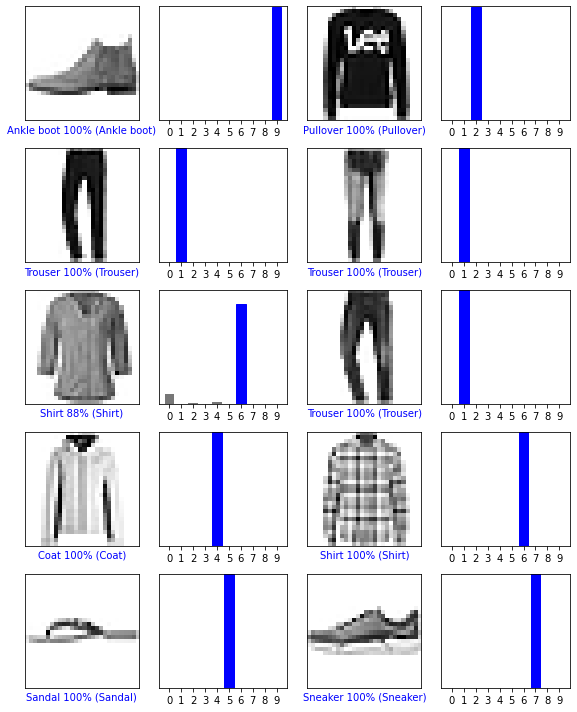

In [22]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [23]:
# Grab an image from the test dataset.
img = test_images[0]



`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [24]:
# Add the image to a batch where it's the only member.
#hint: use np.expand_dims
#complete code below
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [25]:
#complete code below
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.1215144e-09 2.0760867e-10 3.8981107e-09 1.3560792e-08 1.4635770e-09
  2.8665195e-04 4.8449156e-09 1.2723057e-03 1.1213027e-10 9.9844104e-01]]


`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [28]:
#print the predicted class for the image
np.argmax(predictions_single[0])

9

# Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

In order to improve the performance of the model, we use different regularization techniques. There are several techniques, but we will discuss 4 main techniques.

1. L1 Regularization
2. L2 Regularization
3. Dropout
4. Batch Normalization

In [29]:
#Basic pre-processing
#we're importing the iris dataset from sklearn for our model
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) #converting output to one-hot vector
ss = StandardScaler() #standardizing the data
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=16)


data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.target.replace((0.0,1.0,2.0),("setosa","versicolor","virginica"),inplace=True)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
#explore the data (X and y) however you like, (using info(), describe, graphs, etc.) and write any 4 lines on what you understood about the dataset

#Solution can be anything
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
data.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [124]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

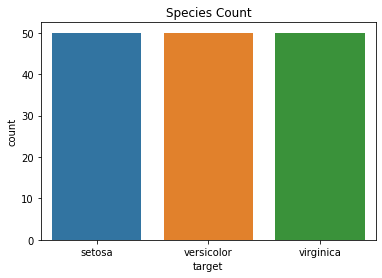

In [33]:
plt.title("Species Count")
sns.countplot(data["target"])

data["target"].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on petal length and width'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

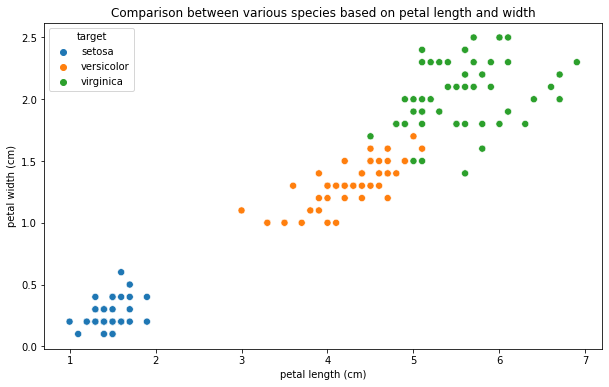

In [34]:
plt.figure(figsize=(10,6))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(data["petal length (cm)"], data["petal width (cm)"], hue = data["target"], s= 50)

<AxesSubplot:>

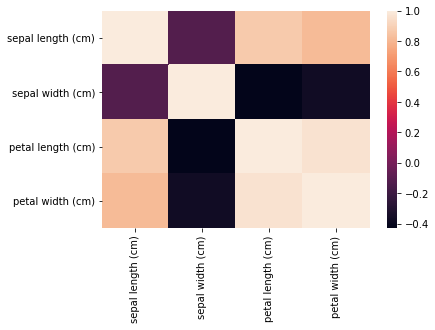

In [35]:
sns.heatmap(data.corr())

Understandings from the exploratory data analysis:

There are 150 rows and 5 columns in the dataset.
There are 5 columns in the dataset, 4 of which determine the 5th one.
Thus there are 150 records in the dataset, and all columns are not-null.
The 4 features(petal length, petal width, sepal length and sepal width) determine the target variable: species.
There are 3 possible values of the target variable(setosa,versicolor,virginica) and all 3 are equal in count,i.e, 50.
Setosa species have the smallest petal length as well as petal width,
Versicolor species have average petal length and petal width and
Virginica species have the highest petal length as well as petal width.



And the model predicts a label as expected.

In [36]:
#model building

#run the code given below and observe the performance of this simple model having no regularization

model1 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model1.summary())
model1.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist1 = model1.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2560      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

1/1 [==============================] - 0s 42ms/step - loss: 0.4196 - acc: 0.8839 - mse: 0.0710 - val_loss: 0.5330 - val_acc: 0.7632 - val_mse: 0.1007
Epoch 45/150
1/1 [==============================] - 0s 40ms/step - loss: 0.4151 - acc: 0.8839 - mse: 0.0702 - val_loss: 0.5295 - val_acc: 0.7632 - val_mse: 0.1002
Epoch 46/150
1/1 [==============================] - 0s 59ms/step - loss: 0.4107 - acc: 0.8839 - mse: 0.0694 - val_loss: 0.5260 - val_acc: 0.7632 - val_mse: 0.0997
Epoch 47/150
1/1 [==============================] - 0s 59ms/step - loss: 0.4064 - acc: 0.8839 - mse: 0.0686 - val_loss: 0.5227 - val_acc: 0.7632 - val_mse: 0.0992
Epoch 48/150
1/1 [==============================] - 0s 61ms/step - loss: 0.4021 - acc: 0.8839 - mse: 0.0678 - val_loss: 0.5194 - val_acc: 0.7632 - val_mse: 0.0988
Epoch 49/150
1/1 [==============================] - 0s 74ms/step - loss: 0.3980 - acc: 0.8839 - mse: 0.0671 - val_loss: 0.5163 - val_acc: 0.7632 - val_mse: 0.0983
Epoch 50/150
1/1 [=================

1/1 [==============================] - 0s 36ms/step - loss: 0.2766 - acc: 0.9286 - mse: 0.0458 - val_loss: 0.4144 - val_acc: 0.7895 - val_mse: 0.0840
Epoch 95/150
1/1 [==============================] - 0s 35ms/step - loss: 0.2747 - acc: 0.9375 - mse: 0.0454 - val_loss: 0.4127 - val_acc: 0.7895 - val_mse: 0.0837
Epoch 96/150
1/1 [==============================] - 0s 41ms/step - loss: 0.2729 - acc: 0.9375 - mse: 0.0451 - val_loss: 0.4110 - val_acc: 0.7895 - val_mse: 0.0835
Epoch 97/150
1/1 [==============================] - 0s 33ms/step - loss: 0.2712 - acc: 0.9375 - mse: 0.0448 - val_loss: 0.4094 - val_acc: 0.7895 - val_mse: 0.0832
Epoch 98/150
1/1 [==============================] - 0s 34ms/step - loss: 0.2694 - acc: 0.9375 - mse: 0.0445 - val_loss: 0.4077 - val_acc: 0.7895 - val_mse: 0.0830
Epoch 99/150
1/1 [==============================] - 0s 34ms/step - loss: 0.2677 - acc: 0.9375 - mse: 0.0442 - val_loss: 0.4061 - val_acc: 0.7895 - val_mse: 0.0827
Epoch 100/150
1/1 [================

1/1 [==============================] - 0s 41ms/step - loss: 0.2069 - acc: 0.9554 - mse: 0.0333 - val_loss: 0.3413 - val_acc: 0.8158 - val_mse: 0.0713
Epoch 145/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2058 - acc: 0.9554 - mse: 0.0331 - val_loss: 0.3399 - val_acc: 0.8158 - val_mse: 0.0710
Epoch 146/150
1/1 [==============================] - 0s 35ms/step - loss: 0.2047 - acc: 0.9554 - mse: 0.0329 - val_loss: 0.3386 - val_acc: 0.8158 - val_mse: 0.0707
Epoch 147/150
1/1 [==============================] - 0s 35ms/step - loss: 0.2036 - acc: 0.9554 - mse: 0.0327 - val_loss: 0.3372 - val_acc: 0.8158 - val_mse: 0.0705
Epoch 148/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2025 - acc: 0.9554 - mse: 0.0324 - val_loss: 0.3359 - val_acc: 0.8158 - val_mse: 0.0702
Epoch 149/150
1/1 [==============================] - 0s 39ms/step - loss: 0.2014 - acc: 0.9554 - mse: 0.0322 - val_loss: 0.3345 - val_acc: 0.8158 - val_mse: 0.0699
Epoch 150/150
1/1 [===========

In [37]:
#After training the model, evaluate the model and find the  loss, accuracy and mse on the test set using the evaluate() function
#print the loss, accuracy and MSE

metrics = model1.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])

Test loss: 0.33319342136383057
Test accuracy: 0.8157894611358643
Test MSE: 0.06962542980909348


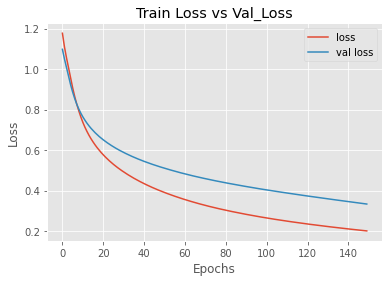

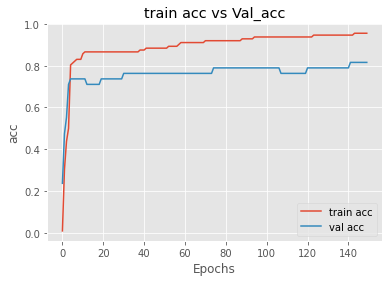

In [38]:
#Observe the plots for Validation Loss and Training Loss.

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# we observe that validation loss is increasing as compared to training loss. 
# This increase in training loss shows that our model is overfitted.

#similarly we plot for model accuracy 
plt.plot(hist1.history['acc'], label = 'train acc')
plt.plot(hist1.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#This again shows that validation accuracy is low as compared to training accuracy, which again shows signs of overfitting. 




## L1 Regularization:
 


In [47]:

#A commonly used Regularization technique is L1 regularization, also known as Lasso Regularization.

#The main concept of L1 Regularization is that we have to penalize our weights by adding absolute values of weight in our loss function, multiplied by a regularization parameter lambda λ, where λ is manually tuned to be greater than 0.



#to implement L1 regularization, create another model called model2 similar to model1, this time add an extra parameter kernel_regularizer, which we set it to ‘l1’ for L1 Regularization in the first Dense layer:

model2 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l1'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print(model2.summary())
model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist2 = model2.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

1/1 [==============================] - 0s 68ms/step - loss: 1.5234 - acc: 0.8750 - mse: 0.0788 - val_loss: 1.6432 - val_acc: 0.7632 - val_mse: 0.1107
Epoch 45/150
1/1 [==============================] - 0s 64ms/step - loss: 1.5162 - acc: 0.8750 - mse: 0.0778 - val_loss: 1.6364 - val_acc: 0.7632 - val_mse: 0.1099
Epoch 46/150
1/1 [==============================] - 0s 49ms/step - loss: 1.5092 - acc: 0.8750 - mse: 0.0769 - val_loss: 1.6297 - val_acc: 0.7632 - val_mse: 0.1091
Epoch 47/150
1/1 [==============================] - 0s 49ms/step - loss: 1.5023 - acc: 0.8750 - mse: 0.0759 - val_loss: 1.6232 - val_acc: 0.7632 - val_mse: 0.1083
Epoch 48/150
1/1 [==============================] - 0s 45ms/step - loss: 1.4955 - acc: 0.8750 - mse: 0.0750 - val_loss: 1.6168 - val_acc: 0.7632 - val_mse: 0.1076
Epoch 49/150
1/1 [==============================] - 0s 37ms/step - loss: 1.4889 - acc: 0.8750 - mse: 0.0741 - val_loss: 1.6105 - val_acc: 0.7632 - val_mse: 0.1068
Epoch 50/150
1/1 [=================

1/1 [==============================] - 0s 36ms/step - loss: 1.2666 - acc: 0.9375 - mse: 0.0480 - val_loss: 1.3962 - val_acc: 0.7632 - val_mse: 0.0850
Epoch 95/150
1/1 [==============================] - 0s 37ms/step - loss: 1.2627 - acc: 0.9375 - mse: 0.0476 - val_loss: 1.3924 - val_acc: 0.7632 - val_mse: 0.0846
Epoch 96/150
1/1 [==============================] - 0s 36ms/step - loss: 1.2589 - acc: 0.9375 - mse: 0.0472 - val_loss: 1.3886 - val_acc: 0.7632 - val_mse: 0.0843
Epoch 97/150
1/1 [==============================] - 0s 36ms/step - loss: 1.2551 - acc: 0.9375 - mse: 0.0469 - val_loss: 1.3847 - val_acc: 0.7632 - val_mse: 0.0839
Epoch 98/150
1/1 [==============================] - 0s 40ms/step - loss: 1.2513 - acc: 0.9375 - mse: 0.0465 - val_loss: 1.3810 - val_acc: 0.7632 - val_mse: 0.0836
Epoch 99/150
1/1 [==============================] - 0s 34ms/step - loss: 1.2475 - acc: 0.9375 - mse: 0.0461 - val_loss: 1.3772 - val_acc: 0.7632 - val_mse: 0.0832
Epoch 100/150
1/1 [================

1/1 [==============================] - 0s 35ms/step - loss: 1.1003 - acc: 0.9554 - mse: 0.0329 - val_loss: 1.2221 - val_acc: 0.8158 - val_mse: 0.0682
Epoch 145/150
1/1 [==============================] - 0s 34ms/step - loss: 1.0975 - acc: 0.9554 - mse: 0.0327 - val_loss: 1.2190 - val_acc: 0.8421 - val_mse: 0.0679
Epoch 146/150
1/1 [==============================] - 0s 34ms/step - loss: 1.0946 - acc: 0.9554 - mse: 0.0325 - val_loss: 1.2158 - val_acc: 0.8421 - val_mse: 0.0675
Epoch 147/150
1/1 [==============================] - 0s 33ms/step - loss: 1.0917 - acc: 0.9554 - mse: 0.0323 - val_loss: 1.2126 - val_acc: 0.8421 - val_mse: 0.0672
Epoch 148/150
1/1 [==============================] - 0s 38ms/step - loss: 1.0889 - acc: 0.9554 - mse: 0.0320 - val_loss: 1.2095 - val_acc: 0.8421 - val_mse: 0.0669
Epoch 149/150
1/1 [==============================] - 0s 34ms/step - loss: 1.0861 - acc: 0.9554 - mse: 0.0318 - val_loss: 1.2064 - val_acc: 0.8421 - val_mse: 0.0666
Epoch 150/150
1/1 [===========

In [48]:


#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set


metrics = model2.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])

 


Test loss: 1.203304648399353
Test accuracy: 0.8421052694320679
Test MSE: 0.0663374587893486


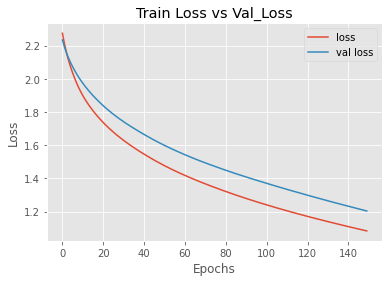

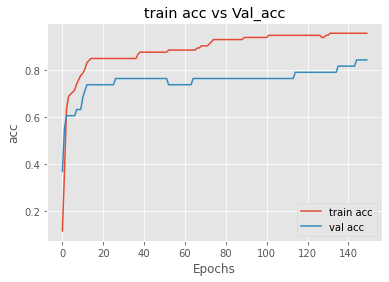

In [49]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist2.history['acc'], label = 'train acc')
plt.plot(hist2.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


 


In [52]:

# create a new model model3, similar to model1 and model2 and add l1 in more layers to check if it improves the model or not.

model3 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l1' ),
    Dense(512//2, activation='tanh', kernel_regularizer='l1'),
    Dense(512//4, activation='tanh', kernel_regularizer='l1'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu', kernel_regularizer='l1'),
    Dense(3, activation='softmax')
])

print(model3.summary())
model3.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist3 = model3.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

Epoch 44/150
1/1 [==============================] - 0s 51ms/step - loss: 75.5293 - acc: 0.9018 - mse: 0.0720 - val_loss: 75.4737 - val_acc: 0.7632 - val_mse: 0.0996
Epoch 45/150
1/1 [==============================] - 0s 65ms/step - loss: 75.3649 - acc: 0.9018 - mse: 0.0710 - val_loss: 75.3103 - val_acc: 0.7632 - val_mse: 0.0988
Epoch 46/150
1/1 [==============================] - 0s 66ms/step - loss: 75.2010 - acc: 0.9018 - mse: 0.0700 - val_loss: 75.1470 - val_acc: 0.7895 - val_mse: 0.0980
Epoch 47/150
1/1 [==============================] - 0s 51ms/step - loss: 75.0372 - acc: 0.9018 - mse: 0.0690 - val_loss: 74.9842 - val_acc: 0.7895 - val_mse: 0.0972
Epoch 48/150
1/1 [==============================] - 0s 51ms/step - loss: 74.8739 - acc: 0.9018 - mse: 0.0681 - val_loss: 74.8214 - val_acc: 0.7895 - val_mse: 0.0965
Epoch 49/150
1/1 [==============================] - 0s 43ms/step - loss: 74.7107 - acc: 0.9196 - mse: 0.0672 - val_loss: 74.6591 - val_acc: 0.7895 - val_mse: 0.0957
Epoch 50/1

1/1 [==============================] - 0s 39ms/step - loss: 67.7871 - acc: 0.9554 - mse: 0.0435 - val_loss: 67.7470 - val_acc: 0.7895 - val_mse: 0.0739
Epoch 94/150
1/1 [==============================] - 0s 36ms/step - loss: 67.6347 - acc: 0.9554 - mse: 0.0431 - val_loss: 67.5947 - val_acc: 0.7895 - val_mse: 0.0735
Epoch 95/150
1/1 [==============================] - 0s 40ms/step - loss: 67.4825 - acc: 0.9554 - mse: 0.0428 - val_loss: 67.4425 - val_acc: 0.7895 - val_mse: 0.0731
Epoch 96/150
1/1 [==============================] - 0s 39ms/step - loss: 67.3306 - acc: 0.9554 - mse: 0.0424 - val_loss: 67.2904 - val_acc: 0.7895 - val_mse: 0.0727
Epoch 97/150
1/1 [==============================] - 0s 59ms/step - loss: 67.1787 - acc: 0.9554 - mse: 0.0421 - val_loss: 67.1386 - val_acc: 0.8158 - val_mse: 0.0723
Epoch 98/150
1/1 [==============================] - 0s 44ms/step - loss: 67.0271 - acc: 0.9554 - mse: 0.0418 - val_loss: 66.9870 - val_acc: 0.8158 - val_mse: 0.0719
Epoch 99/150
1/1 [=====

1/1 [==============================] - 0s 39ms/step - loss: 60.5524 - acc: 0.9643 - mse: 0.0317 - val_loss: 60.5102 - val_acc: 0.8684 - val_mse: 0.0591
Epoch 143/150
1/1 [==============================] - 0s 34ms/step - loss: 60.4096 - acc: 0.9643 - mse: 0.0316 - val_loss: 60.3674 - val_acc: 0.8684 - val_mse: 0.0588
Epoch 144/150
1/1 [==============================] - 0s 35ms/step - loss: 60.2670 - acc: 0.9643 - mse: 0.0314 - val_loss: 60.2247 - val_acc: 0.8684 - val_mse: 0.0586
Epoch 145/150
1/1 [==============================] - 0s 37ms/step - loss: 60.1246 - acc: 0.9643 - mse: 0.0313 - val_loss: 60.0822 - val_acc: 0.8684 - val_mse: 0.0584
Epoch 146/150
1/1 [==============================] - 0s 39ms/step - loss: 59.9823 - acc: 0.9732 - mse: 0.0311 - val_loss: 59.9398 - val_acc: 0.8684 - val_mse: 0.0582
Epoch 147/150
1/1 [==============================] - 0s 34ms/step - loss: 59.8403 - acc: 0.9643 - mse: 0.0310 - val_loss: 59.7977 - val_acc: 0.8684 - val_mse: 0.0580
Epoch 148/150
1/1 

In [53]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model3.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])
 



Test loss: 59.37242889404297
Test accuracy: 0.8684210777282715
Test MSE: 0.05737742781639099


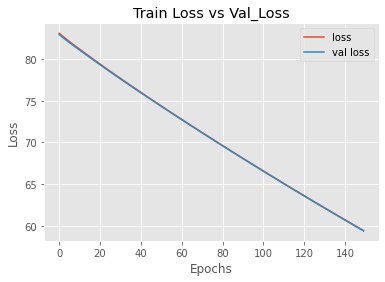

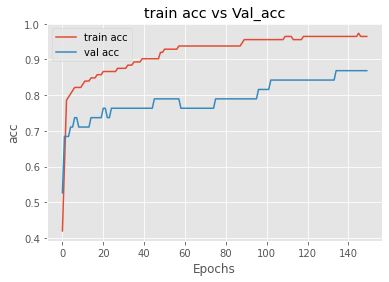

In [54]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist3.history['loss'], label = 'loss')
plt.plot(hist3.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist3.history['acc'], label = 'train acc')
plt.plot(hist3.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



## L2 Regularization


In [55]:
 

# L2 Regularization is another regularization technique which is also known as Ridge regularization. In L2 regularization we add the squared magnitude of weights to penalize our lost function.

#to implement L2 regularization, create another model called model4 similar to our initial basic model, this time add an extra parameter kernel_regularizer, which we set to ‘l2’ for L1 Regularization in the first Dense layer.
#compile and run the model

model4 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l2' ),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print(model4.summary())
model4.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist4 = model4.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

 


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

1/1 [==============================] - 0s 38ms/step - loss: 0.5742 - acc: 0.8393 - mse: 0.0877 - val_loss: 0.6585 - val_acc: 0.7368 - val_mse: 0.1114
Epoch 45/150
1/1 [==============================] - 0s 32ms/step - loss: 0.5691 - acc: 0.8393 - mse: 0.0867 - val_loss: 0.6543 - val_acc: 0.7368 - val_mse: 0.1107
Epoch 46/150
1/1 [==============================] - 0s 34ms/step - loss: 0.5640 - acc: 0.8393 - mse: 0.0858 - val_loss: 0.6503 - val_acc: 0.7368 - val_mse: 0.1100
Epoch 47/150
1/1 [==============================] - 0s 48ms/step - loss: 0.5591 - acc: 0.8393 - mse: 0.0849 - val_loss: 0.6463 - val_acc: 0.7368 - val_mse: 0.1094
Epoch 48/150
1/1 [==============================] - 0s 42ms/step - loss: 0.5544 - acc: 0.8482 - mse: 0.0840 - val_loss: 0.6425 - val_acc: 0.7368 - val_mse: 0.1088
Epoch 49/150
1/1 [==============================] - 0s 36ms/step - loss: 0.5497 - acc: 0.8571 - mse: 0.0831 - val_loss: 0.6386 - val_acc: 0.7368 - val_mse: 0.1082
Epoch 50/150
1/1 [=================

1/1 [==============================] - 0s 35ms/step - loss: 0.3949 - acc: 0.9107 - mse: 0.0535 - val_loss: 0.5162 - val_acc: 0.7632 - val_mse: 0.0888
Epoch 95/150
1/1 [==============================] - 0s 35ms/step - loss: 0.3928 - acc: 0.9107 - mse: 0.0531 - val_loss: 0.5146 - val_acc: 0.7632 - val_mse: 0.0886
Epoch 96/150
1/1 [==============================] - 0s 40ms/step - loss: 0.3907 - acc: 0.9107 - mse: 0.0528 - val_loss: 0.5131 - val_acc: 0.7895 - val_mse: 0.0884
Epoch 97/150
1/1 [==============================] - 0s 34ms/step - loss: 0.3886 - acc: 0.9196 - mse: 0.0524 - val_loss: 0.5115 - val_acc: 0.7895 - val_mse: 0.0882
Epoch 98/150
1/1 [==============================] - 0s 34ms/step - loss: 0.3866 - acc: 0.9196 - mse: 0.0520 - val_loss: 0.5100 - val_acc: 0.7632 - val_mse: 0.0880
Epoch 99/150
1/1 [==============================] - 0s 39ms/step - loss: 0.3845 - acc: 0.9196 - mse: 0.0517 - val_loss: 0.5084 - val_acc: 0.7632 - val_mse: 0.0878
Epoch 100/150
1/1 [================

1/1 [==============================] - 0s 33ms/step - loss: 0.3135 - acc: 0.9464 - mse: 0.0388 - val_loss: 0.4472 - val_acc: 0.7895 - val_mse: 0.0778
Epoch 145/150
1/1 [==============================] - 0s 35ms/step - loss: 0.3123 - acc: 0.9464 - mse: 0.0385 - val_loss: 0.4458 - val_acc: 0.7895 - val_mse: 0.0775
Epoch 146/150
1/1 [==============================] - 0s 41ms/step - loss: 0.3110 - acc: 0.9464 - mse: 0.0383 - val_loss: 0.4444 - val_acc: 0.7895 - val_mse: 0.0772
Epoch 147/150
1/1 [==============================] - 0s 43ms/step - loss: 0.3097 - acc: 0.9464 - mse: 0.0381 - val_loss: 0.4430 - val_acc: 0.7895 - val_mse: 0.0770
Epoch 148/150
1/1 [==============================] - 0s 56ms/step - loss: 0.3085 - acc: 0.9464 - mse: 0.0378 - val_loss: 0.4416 - val_acc: 0.7895 - val_mse: 0.0767
Epoch 149/150
1/1 [==============================] - 0s 58ms/step - loss: 0.3073 - acc: 0.9464 - mse: 0.0376 - val_loss: 0.4403 - val_acc: 0.7895 - val_mse: 0.0764
Epoch 150/150
1/1 [===========

In [56]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model4.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])

Test loss: 0.4389144480228424
Test accuracy: 0.7894737124443054
Test MSE: 0.07618751376867294


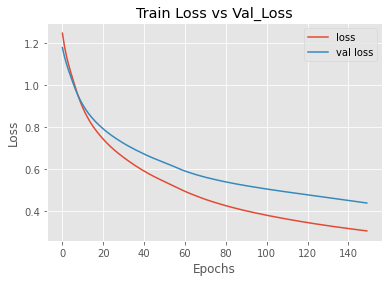

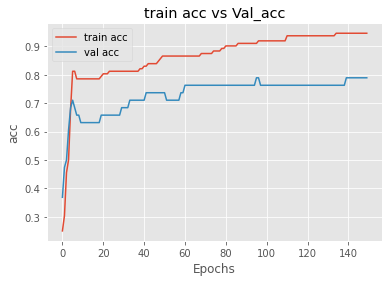

In [57]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before


import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist4.history['loss'], label = 'loss')
plt.plot(hist4.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist4.history['acc'], label = 'train acc')
plt.plot(hist4.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [62]:

# Now create model5 having similar to the above models having L2 in all other layers.

model5 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l2'),
    Dense(512//2, activation='tanh', kernel_regularizer='l2'),
    Dense(512//4, activation='tanh', kernel_regularizer='l2'),
    Dense(512//8, activation='tanh', kernel_regularizer='l2'),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dense(3, activation='softmax', kernel_regularizer='l2')
])

print(model5.summary())
model5.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist5 = model5.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_65 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
_______________________________________________

Epoch 44/150
1/1 [==============================] - 0s 35ms/step - loss: 6.9425 - acc: 0.8125 - mse: 0.0913 - val_loss: 7.0406 - val_acc: 0.7105 - val_mse: 0.1179
Epoch 45/150
1/1 [==============================] - 0s 37ms/step - loss: 6.9359 - acc: 0.8125 - mse: 0.0905 - val_loss: 7.0345 - val_acc: 0.7105 - val_mse: 0.1174
Epoch 46/150
1/1 [==============================] - 0s 37ms/step - loss: 6.9293 - acc: 0.8125 - mse: 0.0898 - val_loss: 7.0284 - val_acc: 0.7105 - val_mse: 0.1168
Epoch 47/150
1/1 [==============================] - 0s 36ms/step - loss: 6.9229 - acc: 0.8125 - mse: 0.0891 - val_loss: 7.0225 - val_acc: 0.7105 - val_mse: 0.1163
Epoch 48/150
1/1 [==============================] - 0s 37ms/step - loss: 6.9167 - acc: 0.8125 - mse: 0.0885 - val_loss: 7.0166 - val_acc: 0.7105 - val_mse: 0.1158
Epoch 49/150
1/1 [==============================] - 0s 36ms/step - loss: 6.9105 - acc: 0.8125 - mse: 0.0878 - val_loss: 7.0107 - val_acc: 0.7105 - val_mse: 0.1152
Epoch 50/150
1/1 [====

1/1 [==============================] - 0s 37ms/step - loss: 6.6858 - acc: 0.8750 - mse: 0.0663 - val_loss: 6.7873 - val_acc: 0.7895 - val_mse: 0.0954
Epoch 95/150
1/1 [==============================] - 0s 62ms/step - loss: 6.6814 - acc: 0.8750 - mse: 0.0659 - val_loss: 6.7828 - val_acc: 0.7895 - val_mse: 0.0950
Epoch 96/150
1/1 [==============================] - 0s 38ms/step - loss: 6.6771 - acc: 0.8750 - mse: 0.0655 - val_loss: 6.7784 - val_acc: 0.7895 - val_mse: 0.0946
Epoch 97/150
1/1 [==============================] - 0s 38ms/step - loss: 6.6727 - acc: 0.8750 - mse: 0.0651 - val_loss: 6.7740 - val_acc: 0.7895 - val_mse: 0.0942
Epoch 98/150
1/1 [==============================] - 0s 39ms/step - loss: 6.6683 - acc: 0.8750 - mse: 0.0647 - val_loss: 6.7696 - val_acc: 0.7895 - val_mse: 0.0938
Epoch 99/150
1/1 [==============================] - 0s 33ms/step - loss: 6.6640 - acc: 0.8750 - mse: 0.0642 - val_loss: 6.7652 - val_acc: 0.7632 - val_mse: 0.0934
Epoch 100/150
1/1 [================

Epoch 144/150
1/1 [==============================] - 0s 37ms/step - loss: 6.4838 - acc: 0.9286 - mse: 0.0482 - val_loss: 6.5833 - val_acc: 0.7895 - val_mse: 0.0779
Epoch 145/150
1/1 [==============================] - 0s 35ms/step - loss: 6.4801 - acc: 0.9286 - mse: 0.0479 - val_loss: 6.5796 - val_acc: 0.7895 - val_mse: 0.0777
Epoch 146/150
1/1 [==============================] - 0s 35ms/step - loss: 6.4764 - acc: 0.9286 - mse: 0.0476 - val_loss: 6.5758 - val_acc: 0.7895 - val_mse: 0.0774
Epoch 147/150
1/1 [==============================] - 0s 39ms/step - loss: 6.4727 - acc: 0.9286 - mse: 0.0473 - val_loss: 6.5721 - val_acc: 0.7895 - val_mse: 0.0771
Epoch 148/150
1/1 [==============================] - 0s 39ms/step - loss: 6.4691 - acc: 0.9286 - mse: 0.0471 - val_loss: 6.5684 - val_acc: 0.7895 - val_mse: 0.0768
Epoch 149/150
1/1 [==============================] - 0s 37ms/step - loss: 6.4654 - acc: 0.9286 - mse: 0.0468 - val_loss: 6.5647 - val_acc: 0.7895 - val_mse: 0.0765
Epoch 150/150
1/

In [63]:

#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model5.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])


Test loss: 6.561059474945068
Test accuracy: 0.7894737124443054
Test MSE: 0.07621122896671295


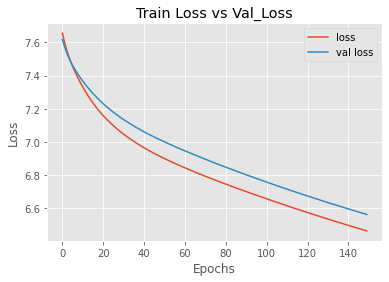

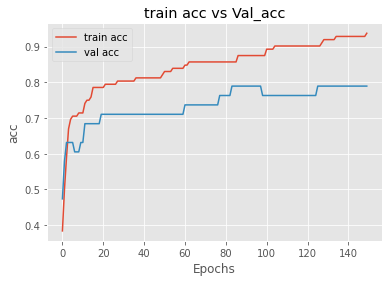

In [64]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before


import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist5.history['loss'], label = 'loss')
plt.plot(hist5.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist5.history['acc'], label = 'train acc')
plt.plot(hist5.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



 

## Dropout
 


In [67]:

#Another common way to avoid regularization is by using the Dropout technique. The main idea behind using dropout is that we randomly turn off some neurons in our layer based on some probability.

# Create a model6 having same layers as the basic model. Add a dropout layer in this model, lets say after the 1st dense layer, and set dropout rate as 50%
import tensorflow as tf

model6 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.5),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print(model6.summary())
model6.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist6 = model6.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_76 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_79 (Dense)             (None, 3)               

1/1 [==============================] - 0s 41ms/step - loss: 0.4686 - acc: 0.8661 - mse: 0.0810 - val_loss: 0.5834 - val_acc: 0.7632 - val_mse: 0.1110
Epoch 44/150
1/1 [==============================] - 0s 40ms/step - loss: 0.4624 - acc: 0.8571 - mse: 0.0799 - val_loss: 0.5796 - val_acc: 0.7632 - val_mse: 0.1105
Epoch 45/150
1/1 [==============================] - 0s 37ms/step - loss: 0.4432 - acc: 0.8750 - mse: 0.0755 - val_loss: 0.5765 - val_acc: 0.7632 - val_mse: 0.1101
Epoch 46/150
1/1 [==============================] - 0s 38ms/step - loss: 0.4537 - acc: 0.8661 - mse: 0.0780 - val_loss: 0.5733 - val_acc: 0.7632 - val_mse: 0.1097
Epoch 47/150
1/1 [==============================] - 0s 41ms/step - loss: 0.4403 - acc: 0.8571 - mse: 0.0761 - val_loss: 0.5702 - val_acc: 0.7632 - val_mse: 0.1093
Epoch 48/150
1/1 [==============================] - 0s 42ms/step - loss: 0.4346 - acc: 0.8750 - mse: 0.0742 - val_loss: 0.5668 - val_acc: 0.7632 - val_mse: 0.1088
Epoch 49/150
1/1 [=================

1/1 [==============================] - 0s 47ms/step - loss: 0.3029 - acc: 0.9375 - mse: 0.0510 - val_loss: 0.4526 - val_acc: 0.7632 - val_mse: 0.0929
Epoch 94/150
1/1 [==============================] - 0s 42ms/step - loss: 0.2928 - acc: 0.9107 - mse: 0.0481 - val_loss: 0.4509 - val_acc: 0.7632 - val_mse: 0.0927
Epoch 95/150
1/1 [==============================] - 0s 39ms/step - loss: 0.2924 - acc: 0.9286 - mse: 0.0489 - val_loss: 0.4482 - val_acc: 0.7632 - val_mse: 0.0922
Epoch 96/150
1/1 [==============================] - 0s 36ms/step - loss: 0.2993 - acc: 0.9375 - mse: 0.0497 - val_loss: 0.4461 - val_acc: 0.7632 - val_mse: 0.0919
Epoch 97/150
1/1 [==============================] - 0s 45ms/step - loss: 0.2992 - acc: 0.9286 - mse: 0.0500 - val_loss: 0.4440 - val_acc: 0.7632 - val_mse: 0.0915
Epoch 98/150
1/1 [==============================] - 0s 63ms/step - loss: 0.2924 - acc: 0.9286 - mse: 0.0486 - val_loss: 0.4421 - val_acc: 0.7632 - val_mse: 0.0912
Epoch 99/150
1/1 [=================

1/1 [==============================] - 0s 35ms/step - loss: 0.2299 - acc: 0.9554 - mse: 0.0377 - val_loss: 0.3664 - val_acc: 0.7895 - val_mse: 0.0782
Epoch 144/150
1/1 [==============================] - 0s 40ms/step - loss: 0.2205 - acc: 0.9464 - mse: 0.0361 - val_loss: 0.3644 - val_acc: 0.7895 - val_mse: 0.0777
Epoch 145/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2091 - acc: 0.9464 - mse: 0.0337 - val_loss: 0.3623 - val_acc: 0.7895 - val_mse: 0.0773
Epoch 146/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2045 - acc: 0.9464 - mse: 0.0319 - val_loss: 0.3609 - val_acc: 0.7895 - val_mse: 0.0770
Epoch 147/150
1/1 [==============================] - 0s 40ms/step - loss: 0.2157 - acc: 0.9375 - mse: 0.0355 - val_loss: 0.3589 - val_acc: 0.7895 - val_mse: 0.0765
Epoch 148/150
1/1 [==============================] - 0s 36ms/step - loss: 0.2111 - acc: 0.9554 - mse: 0.0339 - val_loss: 0.3571 - val_acc: 0.8158 - val_mse: 0.0761
Epoch 149/150
1/1 [===========

In [68]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

 
metrics = model6.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2]) 


Test loss: 0.35438278317451477
Test accuracy: 0.8157894611358643
Test MSE: 0.07563848793506622


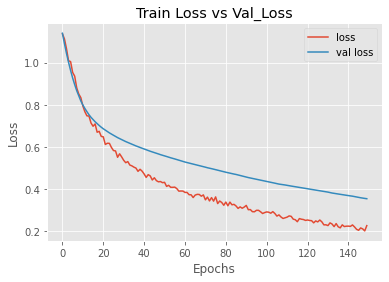

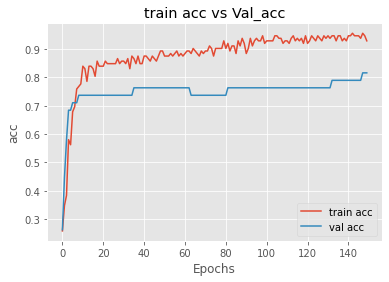

In [69]:

# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist6.history['loss'], label = 'loss')
plt.plot(hist6.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist6.history['acc'], label = 'train acc')
plt.plot(hist6.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [125]:
# Create model7, having more dropout layers, having a dropout rate of your choice

model7 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dropout(0.2),
    Dense(512//2, activation='tanh'),
    Dropout(0.3),
    Dense(512//4, activation='tanh'),
    Dropout(0.5),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print(model7.summary())
model7.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist7 = model7.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 512)               2560      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_214 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 64)              

1/1 [==============================] - 0s 39ms/step - loss: 0.4891 - acc: 0.8393 - mse: 0.0896 - val_loss: 0.5359 - val_acc: 0.7368 - val_mse: 0.1075
Epoch 42/150
1/1 [==============================] - 0s 43ms/step - loss: 0.4829 - acc: 0.8214 - mse: 0.0888 - val_loss: 0.5322 - val_acc: 0.7368 - val_mse: 0.1070
Epoch 43/150
1/1 [==============================] - 0s 40ms/step - loss: 0.5039 - acc: 0.8304 - mse: 0.0941 - val_loss: 0.5298 - val_acc: 0.7368 - val_mse: 0.1069
Epoch 44/150
1/1 [==============================] - 0s 42ms/step - loss: 0.5013 - acc: 0.8036 - mse: 0.0948 - val_loss: 0.5268 - val_acc: 0.7368 - val_mse: 0.1065
Epoch 45/150
1/1 [==============================] - 0s 38ms/step - loss: 0.4552 - acc: 0.8571 - mse: 0.0818 - val_loss: 0.5235 - val_acc: 0.7368 - val_mse: 0.1060
Epoch 46/150
1/1 [==============================] - 0s 42ms/step - loss: 0.4815 - acc: 0.8482 - mse: 0.0896 - val_loss: 0.5205 - val_acc: 0.7368 - val_mse: 0.1057
Epoch 47/150
1/1 [=================

1/1 [==============================] - 0s 42ms/step - loss: 0.3373 - acc: 0.8929 - mse: 0.0609 - val_loss: 0.4405 - val_acc: 0.7368 - val_mse: 0.0960
Epoch 92/150
1/1 [==============================] - 0s 39ms/step - loss: 0.3451 - acc: 0.8929 - mse: 0.0630 - val_loss: 0.4389 - val_acc: 0.7368 - val_mse: 0.0957
Epoch 93/150
1/1 [==============================] - 0s 40ms/step - loss: 0.3460 - acc: 0.8929 - mse: 0.0637 - val_loss: 0.4370 - val_acc: 0.7368 - val_mse: 0.0954
Epoch 94/150
1/1 [==============================] - 0s 40ms/step - loss: 0.3496 - acc: 0.8750 - mse: 0.0653 - val_loss: 0.4351 - val_acc: 0.7368 - val_mse: 0.0950
Epoch 95/150
1/1 [==============================] - 0s 36ms/step - loss: 0.3240 - acc: 0.8839 - mse: 0.0576 - val_loss: 0.4342 - val_acc: 0.7368 - val_mse: 0.0949
Epoch 96/150
1/1 [==============================] - 0s 42ms/step - loss: 0.3469 - acc: 0.8929 - mse: 0.0637 - val_loss: 0.4329 - val_acc: 0.7368 - val_mse: 0.0947
Epoch 97/150
1/1 [=================

1/1 [==============================] - 0s 40ms/step - loss: 0.2814 - acc: 0.9286 - mse: 0.0499 - val_loss: 0.3833 - val_acc: 0.7632 - val_mse: 0.0861
Epoch 142/150
1/1 [==============================] - 0s 37ms/step - loss: 0.2828 - acc: 0.9107 - mse: 0.0508 - val_loss: 0.3829 - val_acc: 0.7632 - val_mse: 0.0860
Epoch 143/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2764 - acc: 0.8929 - mse: 0.0511 - val_loss: 0.3817 - val_acc: 0.7632 - val_mse: 0.0858
Epoch 144/150
1/1 [==============================] - 0s 38ms/step - loss: 0.2670 - acc: 0.9286 - mse: 0.0468 - val_loss: 0.3803 - val_acc: 0.7632 - val_mse: 0.0855
Epoch 145/150
1/1 [==============================] - 0s 45ms/step - loss: 0.2711 - acc: 0.9196 - mse: 0.0482 - val_loss: 0.3805 - val_acc: 0.7632 - val_mse: 0.0856
Epoch 146/150
1/1 [==============================] - 0s 40ms/step - loss: 0.2777 - acc: 0.9196 - mse: 0.0508 - val_loss: 0.3785 - val_acc: 0.7632 - val_mse: 0.0851
Epoch 147/150
1/1 [===========

In [126]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model7.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])
 



Test loss: 0.3744783401489258
Test accuracy: 0.7631579041481018
Test MSE: 0.0843348279595375


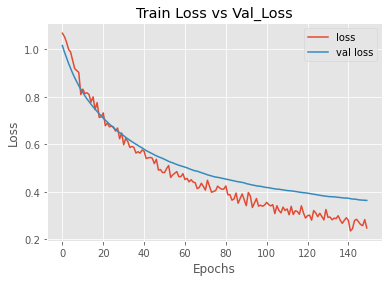

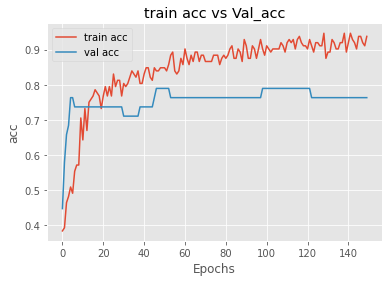

In [119]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before



import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist7.history['acc'], label = 'train acc')
plt.plot(hist7.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

## Batch Normalization


In [77]:

# The main idea behind batch normalization is that we normalize the input layer by using several techniques (sklearn.preprocessing.StandardScaler) in our case, which improves the model performance, so if the input layer is benefitted by normalization, why not normalize the hidden layers, which will improve and fasten learning even further.

# To add it in your TensorFlow model, just add tf.keras.layers.BatchNormalization() after your layers.

#Create model8, having same layers as the first model, but this time add a BatchNormalization layer after the first or second dense layer

model8 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print(model8.summary())
model8.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist8 = model8.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))
 


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_100 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_101 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_102 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_103 (Dense)            (None, 3)               

1/1 [==============================] - 0s 41ms/step - loss: 0.2117 - acc: 0.9464 - mse: 0.0319 - val_loss: 0.6654 - val_acc: 0.8158 - val_mse: 0.1227
Epoch 44/150
1/1 [==============================] - 0s 40ms/step - loss: 0.2094 - acc: 0.9464 - mse: 0.0315 - val_loss: 0.6613 - val_acc: 0.8158 - val_mse: 0.1219
Epoch 45/150
1/1 [==============================] - 0s 43ms/step - loss: 0.2071 - acc: 0.9464 - mse: 0.0312 - val_loss: 0.6575 - val_acc: 0.8158 - val_mse: 0.1211
Epoch 46/150
1/1 [==============================] - 0s 45ms/step - loss: 0.2049 - acc: 0.9464 - mse: 0.0308 - val_loss: 0.6537 - val_acc: 0.8158 - val_mse: 0.1202
Epoch 47/150
1/1 [==============================] - 0s 44ms/step - loss: 0.2027 - acc: 0.9464 - mse: 0.0305 - val_loss: 0.6498 - val_acc: 0.8158 - val_mse: 0.1194
Epoch 48/150
1/1 [==============================] - 0s 40ms/step - loss: 0.2007 - acc: 0.9464 - mse: 0.0302 - val_loss: 0.6461 - val_acc: 0.8158 - val_mse: 0.1187
Epoch 49/150
1/1 [=================

1/1 [==============================] - 0s 54ms/step - loss: 0.1404 - acc: 0.9643 - mse: 0.0204 - val_loss: 0.5218 - val_acc: 0.8158 - val_mse: 0.0945
Epoch 94/150
1/1 [==============================] - 0s 52ms/step - loss: 0.1395 - acc: 0.9643 - mse: 0.0202 - val_loss: 0.5197 - val_acc: 0.8158 - val_mse: 0.0942
Epoch 95/150
1/1 [==============================] - 0s 55ms/step - loss: 0.1387 - acc: 0.9643 - mse: 0.0201 - val_loss: 0.5177 - val_acc: 0.8158 - val_mse: 0.0939
Epoch 96/150
1/1 [==============================] - 0s 53ms/step - loss: 0.1378 - acc: 0.9643 - mse: 0.0200 - val_loss: 0.5158 - val_acc: 0.8158 - val_mse: 0.0935
Epoch 97/150
1/1 [==============================] - 0s 44ms/step - loss: 0.1370 - acc: 0.9732 - mse: 0.0198 - val_loss: 0.5138 - val_acc: 0.8158 - val_mse: 0.0932
Epoch 98/150
1/1 [==============================] - 0s 51ms/step - loss: 0.1361 - acc: 0.9732 - mse: 0.0197 - val_loss: 0.5119 - val_acc: 0.8158 - val_mse: 0.0929
Epoch 99/150
1/1 [=================

Epoch 143/150
1/1 [==============================] - 0s 46ms/step - loss: 0.1072 - acc: 0.9732 - mse: 0.0151 - val_loss: 0.4474 - val_acc: 0.8684 - val_mse: 0.0830
Epoch 144/150
1/1 [==============================] - 0s 39ms/step - loss: 0.1067 - acc: 0.9732 - mse: 0.0150 - val_loss: 0.4463 - val_acc: 0.8684 - val_mse: 0.0828
Epoch 145/150
1/1 [==============================] - 0s 45ms/step - loss: 0.1062 - acc: 0.9732 - mse: 0.0149 - val_loss: 0.4453 - val_acc: 0.8684 - val_mse: 0.0827
Epoch 146/150
1/1 [==============================] - 0s 47ms/step - loss: 0.1057 - acc: 0.9732 - mse: 0.0149 - val_loss: 0.4441 - val_acc: 0.8684 - val_mse: 0.0825
Epoch 147/150
1/1 [==============================] - 0s 41ms/step - loss: 0.1052 - acc: 0.9732 - mse: 0.0148 - val_loss: 0.4431 - val_acc: 0.8684 - val_mse: 0.0824
Epoch 148/150
1/1 [==============================] - 0s 37ms/step - loss: 0.1047 - acc: 0.9732 - mse: 0.0147 - val_loss: 0.4421 - val_acc: 0.8684 - val_mse: 0.0822
Epoch 149/150
1/

In [79]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model8.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])

Test loss: 0.43998968601226807
Test accuracy: 0.8684210777282715
Test MSE: 0.08192434161901474


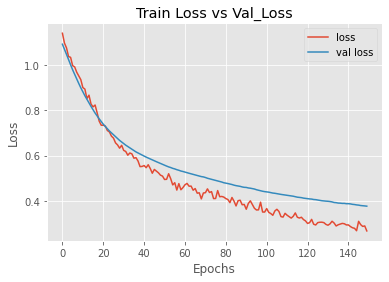

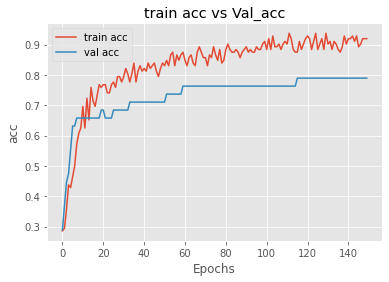

In [80]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist7.history['acc'], label = 'train acc')
plt.plot(hist7.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [104]:

# Now create model9, having a BatchNormalization layer after each dense layer


model9 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    tf.keras.layers.BatchNormalization(),
    Dense(512//2, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//4, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//8, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(3, activation='softmax'),
    tf.keras.layers.BatchNormalization(),
])

print(model9.summary())
model9.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist9 = model9.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))
 


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 512)               2560      
_________________________________________________________________
batch_normalization_70 (Batc (None, 512)               2048      
_________________________________________________________________
dense_171 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_71 (Batc (None, 256)               1024      
_________________________________________________________________
dense_172 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_72 (Batc (None, 128)               512       
_________________________________________________________________
dense_173 (Dense)            (None, 64)              

1/1 [==============================] - 0s 42ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6345 - val_acc: 0.7368 - val_mse: 0.1273
Epoch 40/150
1/1 [==============================] - 0s 39ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6283 - val_acc: 0.7368 - val_mse: 0.1266
Epoch 41/150
1/1 [==============================] - 0s 39ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6221 - val_acc: 0.7368 - val_mse: 0.1259
Epoch 42/150
1/1 [==============================] - 0s 37ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6160 - val_acc: 0.7368 - val_mse: 0.1253
Epoch 43/150
1/1 [==============================] - 0s 40ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6099 - val_acc: 0.7368 - val_mse: 0.1247
Epoch 44/150
1/1 [==============================] - 0s 40ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.6040 - val_acc: 0.7368 - val_mse: 0.1241
Epoch 45/150
1/1 [===========

Epoch 89/150
1/1 [==============================] - 0s 45ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.8714 - val_acc: 0.7632 - val_mse: 0.1174
Epoch 90/150
1/1 [==============================] - 0s 50ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.8769 - val_acc: 0.7632 - val_mse: 0.1177
Epoch 91/150
1/1 [==============================] - 0s 69ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.8834 - val_acc: 0.7632 - val_mse: 0.1181
Epoch 92/150
1/1 [==============================] - 0s 53ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.8916 - val_acc: 0.7632 - val_mse: 0.1184
Epoch 93/150
1/1 [==============================] - 0s 50ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.9021 - val_acc: 0.7632 - val_mse: 0.1187
Epoch 94/150
1/1 [==============================] - 0s 46ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 0.9172 - val_acc: 0.7632 - val_mse: 0.1191
Epoch 95/150
1/1

Epoch 139/150
1/1 [==============================] - 0s 44ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.3774 - val_acc: 0.7632 - val_mse: 0.1550
Epoch 140/150
1/1 [==============================] - 0s 37ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.3869 - val_acc: 0.7632 - val_mse: 0.1562
Epoch 141/150
1/1 [==============================] - 0s 40ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.3999 - val_acc: 0.7632 - val_mse: 0.1574
Epoch 142/150
1/1 [==============================] - 0s 42ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.4215 - val_acc: 0.7632 - val_mse: 0.1586
Epoch 143/150
1/1 [==============================] - 0s 40ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.7085 - val_acc: 0.7632 - val_mse: 0.1599
Epoch 144/150
1/1 [==============================] - 0s 39ms/step - loss: 10.9373 - acc: 0.8482 - mse: 0.5659 - val_loss: 2.7110 - val_acc: 0.7632 - val_mse: 0.1611
Epoch 145/

In [105]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

metrics = model9.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', metrics[0]) 
print('Test accuracy:', metrics[1])
print('Test MSE:', metrics[2])
 

Test loss: 2.7302396297454834
Test accuracy: 0.7368420958518982
Test MSE: 0.16898155212402344


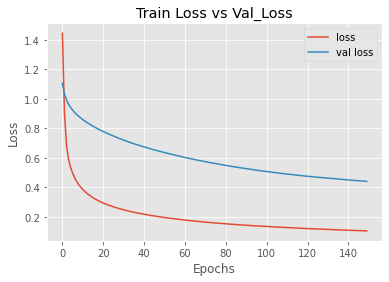

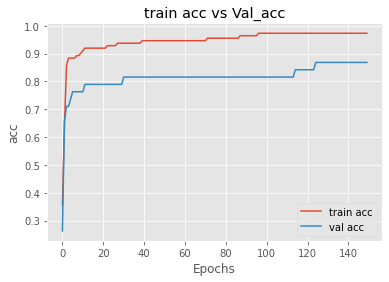

In [106]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist8.history['loss'], label = 'loss')
plt.plot(hist8.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(hist8.history['acc'], label = 'train acc')
plt.plot(hist8.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#After completing the above tasks, note down what you've understood and observed in each of the 9 models and what type of regularization works best for this dataset

Observations:

While training the model, we often overfit it by the training data. This results in low bias and high variance, which in turn reduces the test accuracy. To reduce overfitting and to find the balanced fit, the above 4 regualarization methods are used.


L1 regularization basically adds a absolute weight penalty to the loss function preventing it to go too high. The parameter can be controlled to fit our purpose. In this model, adding l1 regularization to the first Dense layer definitely increases the accuracy by a margin. Furthermore, adding the l1 regularization to more layers increases the accuracy even more taking it to 86.84%.

L2 regularization also penalizes the loss function but this time with the squared magnitude of the weights. The aim here too is to reduce the variance. However, using this regularization method in our model, the accuracy could not be increased. Since we add the squared weights, the resulting value of the loss function would be too less which could have caused the problem.

In the Dropout method, we deactivate a certain percentage of the total neurons in each hidden layer. This reduces the learning time of the model and avoids the neurons from memorizing redundant information. Applying a 0.5 dropout rate after the first layer of the model, and could not see a substantial jump in the test accuracy. Also, adding more droput layers between layers, decreased the test accuracy indicating that turning off many nodes(overusing) can go against the model training.

Batch Normalization technique, works by normalizing the outputs between the various layers. This increases the learning rate and the model will converge faster, helping it get trained better. Adding the batchnormalization layer once at the start increased the accuracy significantly, giving us of the best model outputs of all the above. However, adding a batchnormalization layer after every layer resulted in lower accuracy. 

Hence after trying out all the models, we  see that 2 techniques, first, using L1 Regularization with several hidden layers and second, by using the Batch Normalization layer once, at the start, work best for this dataset.





Loss Functions:

The loss function estimates how well particular algorithm models the provided data. A loss function is the difference between the actual output and the predicted output from the model. This computed difference from the loss functions is termed the error value and this error value is directly proportional to the actual and predicted value. In supervised machine learning algorithms, we want to minimize the error for each training example during the learning process. This is done using some optimization strategies like gradient descent. And this error comes from the loss function.

Optimizers:

Optimizers tie together the loss function and model parameters. They do so by updating the model in response to the output of the loss function. Thus, optimizers shape and mold the model into its most accurate possible form. The loss function is the guide to the goal, and it tells the optimizer when it’s moving in the right or wrong direction.

Gradient descent is an iterative machine learning optimization algorithm to reduce the cost function. Thus, there are multiple iterations with different weights which help models to find the minimum. The entire dataset is seen at once in each iteration and is the weights are updated.

Stochastic Gradient Descent is similar to Gradient Descent but here we use a single datapoint or example to calculate the gradient and update the weights with every iteration. We first need to shuffle the dataset so that we get a completely randomized dataset. The weights are updated for each single example, and as a result the cost function will be noisy as it changes with every sample.

To solve the problem with Stochastic, Mini Batch Gradient Descent can be used. It is a variation of stochastic gradient descent where instead of single training example, mini-batch of samples is used. Mini batch gradient descent is widely used and converges faster and is more stable. Batch size can vary depending on the dataset.

Adagrad is an adaptive learning rate method. In Adagrad we adopt the learning rate to the parameters. We perform larger updates for infrequent parameters and smaller updates for frequent parameters. It is well suited when we have sparse data.

Adam also calculates the individual adaptive learning rate for each parameter from estimates of first and second moments of the gradients. It also reduces the radically diminishing learning rates of Adagrad. Adam implements the exponential moving average of the gradients to scale the learning rate instead of a simple average as in Adagrad. It keeps an exponentially decaying average of past gradients. It is a very popularly used optimizer, also used by us in the Fashion Datset.

